<a href="https://colab.research.google.com/github/mauriciorivasm/MauricioRivas_projects/blob/main/Final_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic analysis de tuits de cuatro medios de comunicación peruanos sobre la pandemia por el covid-19.
**Mauricio** **Rivas**


## Introducción

La pandemia mundial del COVID-19, desencadenada por el virus SARS-CoV-2, se ha convertido en la crisis sanitaria más grande en la historia reciente, tomando por sorpresa a gobiernos de todo el mundo, paralizando las economías y sus cadenas de suministro, y poniendo a prueba los sistemas de salud pública. En el caso específico de Perú, a pesar de la rápida implementación de medidas de confinamiento, las condiciones estructurales de su economía, marcadas por altos niveles de informalidad, y su sistema de salud, caracterizado por la falta de financiamiento y desarticulación (Ponce de Leon, 2021), han llevado al país a registrar la tasa de mortalidad más alta por COVID-19 a nivel mundial, alcanzando la cifra de 6,552 muertes por millón de habitantes (Reporte de contagios y muertes por COVID-19, Worldometer, 2023).

La expansión del COVID-19 se caracterizó por su magnitud y velocidad, lo que generó la necesidad de una constante actualización de información sobre la evolución de los casos, las medidas gubernamentales de inmovilización, las recomendaciones de seguridad y los avances en el desarrollo de vacunas. Sin embargo, el desconocimiento inicial sobre la naturaleza del virus, su forma de contagio y cómo combatirlo provocó altos niveles de incertidumbre y desinformación, especialmente a través de las redes sociales (Malecki et al., 2021).

En este contexto, el papel de los medios de comunicación oficiales resulta esencial. Por un lado, tienen el potencial de monitorear constantemente la situación y proporcionar informes sobre cualquier desarrollo relevante. Por otro lado, pueden difundir información confiable y relevante, evitando la propagación de información no respaldada. Acceder a información precisa y confiable ha sido fundamental para mitigar la carga de salud mental durante la pandemia (Hoyt et al., 2022). Por lo tanto, es importante que los medios de comunicación brinden una cobertura precisa y equilibrada de la pandemia, permitiendo que las personas tomen decisiones informadas sobre su salud, evitando generar ansiedad y estrés, así como reduciendo la incertidumbre y el pánico en la población.

Ante este panorama, surge la pregunta sobre el tipo de cobertura que los medios de noticias formales tuvieron durante la pandemia, especialmente en países que sufrieron fuertemente sus efectos, como Perú. Para abordar esta interrogante, en este trabajo utilizaremos los tweets de cuatro de los principales medios de noticias nacionales, aplicando técnicas de procesamiento de lenguaje natural, específicamente el topic modelling, con el objetivo de realizar un análisis temático.


## Datos

Las fuentes de datos utilizadas en este análisis son los tweets publicados por las cuentas oficiales de cuatro de los principales medios de noticias peruanos: El Comercio, La República, Willax y Ojo Público. La base de datos cuenta con un total de 931460 tweets, que abarcan un periodo que va desde el año 2016 hasta el año 2023, lo cual nos permitirá analizar la evolución de la cobertura de noticias relacionadas a la pandemia del COVID-19.


##Pasos de análisis

- Filtrado: se seleccionaran los tuits que estén relacionados con el tema del Covid-19. Las palabras elegidas para la filtración son las siguientes ['covid', 'coronavirus', 'covid-19', 'pandemia', 'cuarentena']

- Limpieza: se tokenizaran los tuits (transformando el texto a minúscilas, eliminando acentos, stompwords,etc.) para poder trabajar con un texto limpio.
- Una vez filtrados y limpiados los tweets se eliminaran palabras del tópico general (coronavirus, covid-19, covid) ,para descubrir subtemas o aspectos más específicos en los tuits y evitar que los topicos identificados contengan estas palabras mas generales.

- Topic modelling: se aplicaran las técnicas de Non Negative Matrix Factorization (NNMF) y Latent Dirichlet Allocation (LDA) teniendo como parámetro un número de 10 componentes (tópicos)

- Comparar: identificaremos cual modelo permite identificar de manera mas clara los topicos en el corpus

##Preparación del texto

Importamos paquetes a utilizar

In [ ]:
import pandas as pd
import numpy as np
import os
import csv
import datetime
import json
import re
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from nltk.corpus import stopwords # nltk = package for human language data processing.
import os
import csv
import datetime
import json
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Seteamos el directorio

In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


Indicamos la ruta

In [ ]:
os.chdir("drive/MyDrive/Python/PLN/Corpus")

In [ ]:
directorio = "Medios/"

In [ ]:
files = os.listdir(directorio)
files

['Copy of willaxtv.json',
 'Copy of ojo_publico.json',
 'Copy of elcomercio_peru.json',
 'Copy of larepublica_pe.json']

Guardamos los tuits en un data frame

In [ ]:
data=pd.DataFrame()
t=0
for i in files:
  path= directorio+'/'+ i
  with open(path, 'r', encoding="utf-8") as f:
    pf = json.load(f)
    df_aux=pd.DataFrame(pf)
    df_aux=df_aux[:-1]
    df_aux['hand']=i[:-5]
    data = pd.concat([data, df_aux], ignore_index=True, axis=0).reset_index(drop=True)
    t+=1

In [ ]:
data

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician,hand
0,"""1623834016439799811""","""#Noticia | Senadora colombiana env\u00eda car...","""2023-02-09T23:59:33.000Z""","""38512990""","""original""","{'retweet_count': 46, 'reply_count': 27, 'like...",NaN,NaN,Copy of willaxtv
1,"""1623826922483449856""","""#Noticia | Mario Vargas Llosa: muestran bande...","""2023-02-09T23:31:22.000Z""","""38512990""","""original""","{'retweet_count': 6, 'reply_count': 2, 'like_c...",NaN,NaN,Copy of willaxtv
2,"""1623826625002348544""","""#Noticia | Municipalidad de Surquillo clausur...","""2023-02-09T23:30:11.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv
3,"""1623826578533924864""","""#ElRetoDeLaBalanza \nEste domingo desde las ...","""2023-02-09T23:30:00.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv
4,"""1623813916760457219""","""#ENTREVISTA | La reportera de 'Beto A Saber' ...","""2023-02-09T22:39:41.000Z""","""38512990""","""original""","{'retweet_count': 66, 'reply_count': 24, 'like...",NaN,NaN,Copy of willaxtv
...,...,...,...,...,...,...,...,...,...
931455,"""682720549198512128""","""Chicos con autismo, los otros afectados por l...","""2016-01-01T00:30:37.000Z""","""66746614""","""original""","{'retweet_count': 20, 'reply_count': 5, 'like_...",NaN,NaN,Copy of larepublica_pe
931456,"""682718856457142273""","""Ej\u00e9rcito da de baja a cuatro generales d...","""2016-01-01T00:23:54.000Z""","""66746614""","""original""","{'retweet_count': 8, 'reply_count': 4, 'like_c...",NaN,NaN,Copy of larepublica_pe
931457,"""682716428680704000""","""RT@OcioLaRepublica Lorena \u00c1lvarez silenc...","""2016-01-01T00:14:15.000Z""","""66746614""","""original""","{'retweet_count': 1, 'reply_count': 4, 'like_c...",NaN,NaN,Copy of larepublica_pe
931458,"""682715070107893762""","""RT @DeportesLR: #Universitario de Deportes y ...","""2016-01-01T00:08:51.000Z""","""66746614""","""original""","{'retweet_count': 0, 'reply_count': 2, 'like_c...",NaN,NaN,Copy of larepublica_pe


In [ ]:
data.head()

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician,hand
0,"""1623834016439799811""","""#Noticia | Senadora colombiana env\u00eda car...","""2023-02-09T23:59:33.000Z""","""38512990""","""original""","{'retweet_count': 46, 'reply_count': 27, 'like...",NaN,NaN,Copy of willaxtv
1,"""1623826922483449856""","""#Noticia | Mario Vargas Llosa: muestran bande...","""2023-02-09T23:31:22.000Z""","""38512990""","""original""","{'retweet_count': 6, 'reply_count': 2, 'like_c...",NaN,NaN,Copy of willaxtv
2,"""1623826625002348544""","""#Noticia | Municipalidad de Surquillo clausur...","""2023-02-09T23:30:11.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv
3,"""1623826578533924864""","""#ElRetoDeLaBalanza \nEste domingo desde las ...","""2023-02-09T23:30:00.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv
4,"""1623813916760457219""","""#ENTREVISTA | La reportera de 'Beto A Saber' ...","""2023-02-09T22:39:41.000Z""","""38512990""","""original""","{'retweet_count': 66, 'reply_count': 24, 'like...",NaN,NaN,Copy of willaxtv


In [ ]:
data.shape

(931460, 9)

La base de datos original cuenta con 931 460 tweets

###Filtrado por temática

In [ ]:
##Limpiamos tweets preliminarmente

In [ ]:
def clean_accents(tweet):
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)

    return tweet

In [ ]:
f1 = lambda x: re.sub('[,\.!?:/@"]', ' ', x) #elimina caracteres especiales
f2 = lambda x: str(x).lower() # poner en minúsula

In [ ]:
data['filtrado'] =data['text'].apply(f1).apply(f2).apply(clean_accents)

Creamos diccionario con palabras vinculadas a la pandemia por el covid-19

Creamos una nueva base de datos que incluya solo los tweets filtrados por tema

In [ ]:
palabras = ['covid', 'covid19' ,'coronavirus', 'covid-19', 'pandemia', 'cuarentena']
data1 = data[data['filtrado'].str.contains('|'.join(palabras))]

In [ ]:
data1.shape

(69540, 10)

In [ ]:
data1.head()

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician,hand,filtrado
276,"""1622936548386668546""","""#Noticia | EE.UU.: Nueva York ya no exigir\u0...","""2023-02-07T12:33:20.000Z""","""38512990""","""original""","{'retweet_count': 3, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv,#noticia | ee uu nueva york ya no exigir\u0...
1455,"""1619114833533882369""","""#Noticia |\u00a0OMS analiza este viernes si l...","""2023-01-27T23:27:12.000Z""","""38512990""","""original""","{'retweet_count': 3, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv,#noticia |\u00a0oms analiza este viernes si l...
1651,"""1618428511349252097""","""#DrBorda\nEste jueves, desde las 10:00 am. en...","""2023-01-26T02:00:00.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv,#drborda\neste jueves desde las 10 00 am en...
3123,"""1613550566201872384""","""#Noticia | Ministra de Transportes: \""La gest...","""2023-01-12T14:56:47.000Z""","""38512990""","""original""","{'retweet_count': 45, 'reply_count': 19, 'like...",NaN,NaN,Copy of willaxtv,#noticia | ministra de transportes \ la gest...
3616,"""1611551386021281792""","""#MilagrosLeivaEntrevista | Carlos Paredes: No...","""2023-01-07T02:32:46.000Z""","""38512990""","""original""","{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv,#milagrosleivaentrevista | carlos paredes no...


La nueva base de datos cuenta con 69 540 tweets

###Limpieza del texto

Creamos las siguientes funciones:
- clean_accents: elimina los acentos
- f1 = eliminar caracteres especiales
- f2 = convertir el texto a minúscula
- f3 = eliminar stop words
- f4 = eliminar palabras con menos de 3 de largo

In [ ]:
def clean_accents(tweet):
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)

    return tweet

In [ ]:
f1 = lambda x: re.sub('[,\.!?:/@"]', ' ', x)
f2 = lambda x: str(x).lower()

In [ ]:
stop= stopwords.words("spanish")
print(stop)

f3 = lambda x: ' '.join(w.encode('latin-1', errors='ignore').decode('latin-1') for w in x.split() if not w in stop)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
f4 = lambda x: ' '.join(w.encode('latin-1', errors='ignore').decode('latin-1') for w in x.split() if len(w) > 3)

reemplazamos el salto de línea por un espacio

In [ ]:
data1['text_clean'] = data1['text'].str.encode('latin-1', errors='ignore').str.decode('unicode_escape')

<ipython-input-22-70c35938d52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] = data1['text'].str.encode('latin-1', errors='ignore').str.decode('unicode_escape')


In [ ]:
data1['text_clean'] = data1['text_clean'].str.replace('\n', ' ')

<ipython-input-23-b0fcd9a06671>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] = data1['text_clean'].str.replace('\n', ' ')


In [ ]:
data1['text_clean'] = data1['text_clean'].str.replace('\(', " ", regex=True).str.replace('\)', " ", regex=True)

<ipython-input-24-d78171100bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] = data1['text_clean'].str.replace('\(', " ", regex=True).str.replace('\)', " ", regex=True)


In [ ]:
data1['text_clean'] = data1['text_clean'].str.replace('[\)\[\]‐#@]', " ", regex=True)

<ipython-input-25-004d77104816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] = data1['text_clean'].str.replace('[\)\[\]‐#@]', " ", regex=True)


In [ ]:
data1['text_clean'] =data1['text_clean'].apply(f1).apply(f2).apply(f3).apply(f4).apply(clean_accents)

<ipython-input-26-9e274cbc629b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] =data1['text_clean'].apply(f1).apply(f2).apply(f3).apply(f4).apply(clean_accents)


In [ ]:
data1.head()

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician,hand,filtrado,text_clean
276,"""1622936548386668546""","""#Noticia | EE.UU.: Nueva York ya no exigir\u0...","""2023-02-07T12:33:20.000Z""","""38512990""","""original""","{'retweet_count': 3, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv,#noticia | ee uu nueva york ya no exigir\u0...,noticia nueva york exigira vacuna covid-19 fun...
1455,"""1619114833533882369""","""#Noticia |\u00a0OMS analiza este viernes si l...","""2023-01-27T23:27:12.000Z""","""38512990""","""original""","{'retweet_count': 3, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv,#noticia |\u00a0oms analiza este viernes si l...,noticia analiza viernes covid-19 sigue siendo ...
1651,"""1618428511349252097""","""#DrBorda\nEste jueves, desde las 10:00 am. en...","""2023-01-26T02:00:00.000Z""","""38512990""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN,Copy of willaxtv,#drborda\neste jueves desde las 10 00 am en...,drborda jueves borda' ¿que espera luego covid ...
3123,"""1613550566201872384""","""#Noticia | Ministra de Transportes: \""La gest...","""2023-01-12T14:56:47.000Z""","""38512990""","""original""","{'retweet_count': 45, 'reply_count': 19, 'like...",NaN,NaN,Copy of willaxtv,#noticia | ministra de transportes \ la gest...,noticia ministra transportes gestion meritocra...
3616,"""1611551386021281792""","""#MilagrosLeivaEntrevista | Carlos Paredes: No...","""2023-01-07T02:32:46.000Z""","""38512990""","""original""","{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,NaN,Copy of willaxtv,#milagrosleivaentrevista | carlos paredes no...,milagrosleivaentrevista carlos paredes pensaro...


In [ ]:
data1[['text','text_clean']]

,text,text_clean
276,"""#Noticia | EE.UU.: Nueva York ya no exigir\u0...",noticia nueva york exigira vacuna covid-19 fun...
1455,"""#Noticia |\u00a0OMS analiza este viernes si l...",noticia analiza viernes covid-19 sigue siendo ...
1651,"""#DrBorda\nEste jueves, desde las 10:00 am. en...",drborda jueves borda' ¿que espera luego covid ...
3123,"""#Noticia | Ministra de Transportes: \""La gest...",noticia ministra transportes gestion meritocra...
3616,"""#MilagrosLeivaEntrevista | Carlos Paredes: No...",milagrosleivaentrevista carlos paredes pensaro...
...,...,...
782350,"""#URGENTE | Alerta qu\u00edmica en #EstadosUni...",urgente alerta quimica estadosunidos nave ater...
793542,"""Lee la columna de @rmapalacios : La peor pand...",columna rmapalacios peor pandemia silenciosa p...
807056,"""Lee la columna de opini\u00f3n de @pavese: \""...",columna opinion pavese pandemia https ugdac6up...
807181,"""Lee la columna de opini\u00f3n de @pavese: \""...",columna opinion pavese pandemia https pgttvaez...


In [ ]:
pborrar = ['https', 'covid', 'covid19', 'coronavirus', 'covid-19', 'rt', 't', 'como' ,'co','tras' ,'htp','https','fdfq7gkriy','noticias', 'ojoaldato','loultimo', '4ajelmloq2', 'bestcable', 'vivo', 'c1191', 'sigue', 'directv', 'movistartv', 'clarotv', '52rqfuppqu', 'vivo', 'como', 'suscribete', 'milagrosleivaentrevista', 'video', 'noticia', 'suscriptores', 'contenido', '19','covid' 'comercio', 'solo', 'aqui']
print(pborrar)

f5 = lambda x: ' '.join(w.encode('latin-1', errors='ignore').decode('latin-1') for w in x.split() if not w in pborrar)

['https', 'covid', 'covid19', 'coronavirus', 'covid-19', 'rt', 't', 'como', 'co', 'tras', 'htp', 'https', 'fdfq7gkriy', 'noticias', 'ojoaldato', 'loultimo', '4ajelmloq2', 'bestcable', 'vivo', 'c1191', 'sigue', 'directv', 'movistartv', 'clarotv', '52rqfuppqu', 'vivo', 'como', 'suscribete', 'milagrosleivaentrevista', 'video', 'noticia', 'suscriptores', 'contenido', '19', 'covidcomercio', 'solo', 'aqui']


In [ ]:
data1['text_clean'] =data1['text_clean'].apply(f5)

<ipython-input-50-fde1c354b72d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['text_clean'] =data1['text_clean'].apply(f5)


In [ ]:
data1[['text','text_clean']]

,text,text_clean
276,"""#Noticia | EE.UU.: Nueva York ya no exigir\u0...",nueva york exigira vacuna funcionarios yjrw1ha0xi
1455,"""#Noticia |\u00a0OMS analiza este viernes si l...",analiza viernes siendo emergencia internaciona...
1651,"""#DrBorda\nEste jueves, desde las 10:00 am. en...",drborda jueves borda' ¿que espera luego ademas...
3123,"""#Noticia | Ministra de Transportes: \""La gest...",ministra transportes gestion meritocracia cost...
3616,"""#MilagrosLeivaEntrevista | Carlos Paredes: No...",carlos paredes pensaron magnitud pandemia x1rd...
...,...,...
782350,"""#URGENTE | Alerta qu\u00edmica en #EstadosUni...",urgente alerta quimica estadosunidos nave ater...
793542,"""Lee la columna de @rmapalacios : La peor pand...",columna rmapalacios peor pandemia silenciosa p...
807056,"""Lee la columna de opini\u00f3n de @pavese: \""...",columna opinion pavese pandemia ugdac6upae ugd...
807181,"""Lee la columna de opini\u00f3n de @pavese: \""...",columna opinion pavese pandemia pgttvaeznb pgt...


# Método 1: Non Negative Matrix Factorization - NNMF

Para identificar los tópicos necesitamos reducir la dimensionalidad del texto, es decir, descomponer nuestra matriz ${D}$ en dos matrices:
- ${Q}$  = tweets x tópicos
- ${P}$  = topicos x terminos


$\underbrace{D}_{n\times d} \approx \underbrace{Q}_{n \times k} \overbrace{\Sigma}^{k\times k} \underbrace{P^{T}}_{k \times d}$

El método NNMF construye las matrices utilizando la frecuencia de términos (TF, Term Frequency)

##Matriz de término frecuencia (TF)

In [ ]:
tfidf = TfidfVectorizer()

La matriz se construye a partir de los tweets limpios

In [ ]:
tfs = tfidf.fit_transform(data1['text_clean'])

Tuits x términos

In [ ]:
print(tfs.toarray().shape)
tfs.toarray()

(69540, 99218)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Creamos un diccionario de terminos

In [ ]:
print("Nuestro corpus tiene {} terminos:".format(len(tfidf.vocabulary_)))
tfidf.vocabulary_

Nuestro corpus tiene 99218 terminos:


{'nueva': 62556,
 'york': 96294,
 'exigira': 34845,
 'vacuna': 87956,
 'funcionarios': 38131,
 'yjrw1ha0xi': 95946,
 'analiza': 14058,
 'viernes': 89069,
 'siendo': 79316,
 'emergencia': 32353,
 'internacional': 46984,
 '9xgajvc9iy': 10835,
 'drborda': 29964,
 'jueves': 50282,
 'borda': 18677,
 'que': 72479,
 'espera': 33836,
 'luego': 55758,
 'ademas': 12157,
 'consultorio': 23890,
 'ginecologico': 39826,
 'consulta': 23872,
 'pediatra': 67037,
 'receta': 74032,
 'jeanette': 48921,
 'enmanuel': 32876,
 'pierdas': 67812,
 'willax': 91579,
 'television': 82593,
 '2nvmncmayc': 3060,
 'ministra': 58316,
 'transportes': 84213,
 'gestion': 39499,
 'meritocracia': 57799,
 'costado': 24532,
 'pandemia': 66341,
 'v1okzpaa7a': 87647,
 'carlos': 20640,
 'paredes': 66486,
 'pensaron': 67170,
 'magnitud': 56674,
 'x1rdmf47xz': 92890,
 'ernesto': 33495,
 'bustamanete': 19326,
 'fracaso': 37705,
 'varios': 88192,
 'complices': 23194,
 'ministerios': 58313,
 'economia': 31263,
 'relaciones': 74757,
 

In [ ]:
words = np.array(tfidf.get_feature_names_out())
print(len(words))

99218


Tenemos 99218 terminos en total

##Parámetros

Probaremos diferentes números de componentes o tópicos ${k}$ para ver cual permite identificar mejor topics diferentes.

Guardamos la clase NMF como objeto y le damos parámetros iniciales

In [ ]:
nmf = NMF(n_components=10, solver='mu', init='nndsvda')

In [ ]:
Q = nmf.fit_transform(tfs)
P = nmf.components_

69540 tweets x 10 tópicos

In [ ]:
Q.shape

(69540, 10)

10 topicos x 99220 terminos

In [ ]:
P.shape

(10, 99218)

##Palabras más probables por tópico

In [ ]:
for i, topic in enumerate(P):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: fallecidos,salud,ministerio,minsa,decesos,contagios,nuevos,ultimas,horas,reporta
Topic 2: pruebas,minuto,ultimo,minsa,sudamerica,numero,casos,emergencia,cifras,peru
Topic 3: colombia,record,contagios,argentina,brasil,mexico,nuevos,muertes,casos,registra
Topic 4: recibio,segunda,tercera,recibieron,sinopharm,pfizer,primera,vacunas,vacuna,dosis
Topic 5: minsa_peru,diferentes,registrado,marzo,norte,regiones,lima,deceso,oficializo,fallecidos
Topic 6: casos,supero,personas,brasil,recibieron,supera,inmunizados,vacunados,peruanos,millones
Topic 7: como,frente,vizcarra,nueva,pais,gobierno,medidas,cuarentena,salud,pandemia
Topic 8: abril,supera,2020,2021,actualizada,mapa,infectados,mundo,cifra,muertos
Topic 9: hospitalaria,nacional,minsa,recibieron,informo,personas,recuperaron,dados,alta,pacientes
Topic 10: ultimas,niños,avance,restricciones,adultos,callao,lima,mayores,años,vacunacion


Con un parámetro de 10 componentes se identifican palabras  que cubren una variedad de aspectos relacionados con COVID-19, como informes de casos y fallecimientos, vacunación, situación internacional, medidas gubernamentales. Sin embargo, las palabras de algunos temas se solapan, como en el caso del Topic 1 y el Topic 5, pues ambos incluyen "fallecidos", "decesos", "contagios" y "minsa_peru". Esto sugiere que estos dos temas pueden estar relacionados con la situación de la salud y los informes de casos y fallecimientos. Para ello probaremos reducir el numero de topics en el modelo y compararemos los resultados.


**7 topics**

In [ ]:
nmf = NMF(n_components=7, solver='mu', init='nndsvda')

In [ ]:
words = np.array(tfidf.get_feature_names_out())

In [ ]:
Q = nmf.fit_transform(tfs)
P = nmf.components_
most_likely_topic = Q.argmax(axis=1)
for i, topic in enumerate(P):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: fallecidos,salud,ministerio,minsa,decesos,contagios,nuevos,ultimas,reporta,horas
Topic 2: minsa,pfizer,peru,vacunas,primera,mayores,años,vacunacion,vacuna,dosis
Topic 3: argentina,record,contagios,brasil,mexico,muertos,nuevos,muertes,casos,registra
Topic 4: brasil,dosis,vacunas,recibieron,supera,vacuna,inmunizados,vacunados,peruanos,millones
Topic 5: diferentes,registrado,pais,norte,regiones,deceso,oficializo,marzo,fallecidos,lima
Topic 6: informo,casos,numero,cifras,minsa,recuperaron,dados,pacientes,alta,peru
Topic 7: primer,martin,nueva,vizcarra,pais,gobierno,medidas,cuarentena,salud,pandemia


-  Topic 1:  relacionado con los informes de fallecimientos y contagios proporcionados por el Ministerio de Salud (Minsa).
- Topic 2: se centra en la vacunación en Perú, específicamente en la tercera dosis de pfizer, dirigida a personas mayores.
- Topic 3: está relacionado con los casos, contagios y muertes en Argentina, Brasil y México
- Topic 4: aborda las vacunas en Brasil (el país funciono como laboratorio de pruebas y realizó campaña de vacunacion masiva)
- Topic 5: está relacionado con los registros y eventos en diferentes regiones del país, como el aumento de casos y fallecimientos.
- Topic 6: relacionado con informes del minsa sobre casos y pacientes recuperados
 / dados de alta.
- Topic 7: relacionado con el primer caso, martin vizcarra y medidas gubernamentales, como la cuarentena.

In [ ]:
Q.shape

(69540, 7)

In [ ]:
most_likely_topic = Q.argmax(axis=1)

Creamos una columna en el data frame que asigne el topic más probable a cada tweet

In [ ]:
data1['most_likely_topic'] = most_likely_topic

<ipython-input-80-21cc907fbce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['most_likely_topic'] = most_likely_topic


##Análisis descriptivo

Contamos la frecuencia y proporción de cada tópico

In [ ]:
topic_counts = data1['most_likely_topic'].value_counts()
topic_counts



6    33708
1    11052
2     7630
5     7526
4     3510
3     3156
0     2958
Name: most_likely_topic, dtype: int64

In [ ]:
topic_proportions = topic_counts / len(data1)
print(topic_proportions)

6    0.484728
1    0.158930
2    0.109721
5    0.108225
4    0.050475
3    0.045384
0    0.042537
Name: most_likely_topic, dtype: float64


Los 5 temas más comunes son:
- Topic 7: Anuncios de Martin Vizcarra  (33 708 tweets / 48%)
- Topic 2: Vacunacion en el Perú  (11 052 tweets / 16% )
- Topic 3: Emergencia sanitaria mundial en el año 2021  (13 555 tweets / 19%)
- Topic 8: Proceso de vacunación (6293 tweets / 9%)
- Topic 2: Contagios y casos intenacionales (4404 tweets / 6%)


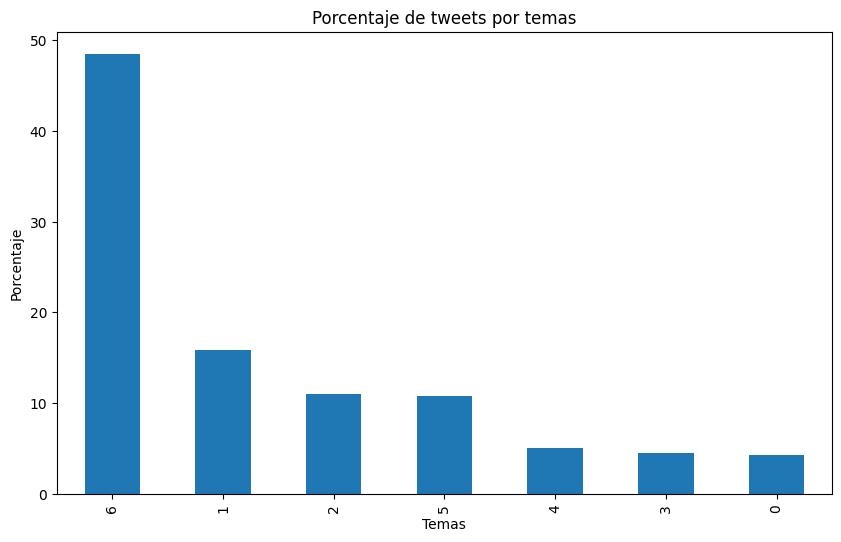

In [ ]:
topic_percentages = topic_proportions* 100

# Histograma de barras
plt.figure(figsize=(10, 6))
topic_percentages.plot(kind='bar')
plt.xlabel('Temas')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de tweets por temas')
plt.show()

Se aprecia claramente que el topic 7 predomina en relación a los tuits que hablan sobre la pandemia. Esto puede deberse a que el primer caso de COVID-19 fue un evento altamente significativo, por lo que recibió una gran cobertura mediática. Además, como presidente en ese momento, Martin Vizcarra tenía un papel clave en la toma de decisiones y la implementación de medidas para contener la propagación del virus, siendo un tema de elevada difusión mediática.

##Visualización: scatter plot

Calculamos la proporción de cada tópico para

In [ ]:
topic_proportions2 = Q.sum(axis=0) / Q.sum()
topic_proportions2

array([0.1001865 , 0.1688852 , 0.15836734, 0.08222806, 0.08586409,
       0.13456998, 0.26989883])

In [ ]:
Q.sum(axis=0)

array([236.40333741, 398.50704367, 373.6887446 , 194.02802333,
       202.6077194 , 317.53571599, 636.86209018])

In [ ]:
Q.sum()

2359.63267457081

Factoriza matriz en dos dimensiones

In [ ]:
# Apply t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 69540 samples in 0.102s...
[t-SNE] Computed neighbors for 69540 samples in 21.381s...
[t-SNE] Computed conditional probabilities for sample 1000 / 69540
[t-SNE] Computed conditional probabilities for sample 2000 / 69540
[t-SNE] Computed conditional probabilities for sample 3000 / 69540
[t-SNE] Computed conditional probabilities for sample 4000 / 69540
[t-SNE] Computed conditional probabilities for sample 5000 / 69540
[t-SNE] Computed conditional probabilities for sample 6000 / 69540
[t-SNE] Computed conditional probabilities for sample 7000 / 69540
[t-SNE] Computed conditional probabilities for sample 8000 / 69540
[t-SNE] Computed conditional probabilities for sample 9000 / 69540
[t-SNE] Computed conditional probabilities for sample 10000 / 69540
[t-SNE] Computed conditional probabilities for sample 11000 / 69540
[t-SNE] Computed conditional probabilities for sample 12000 / 69540
[t-SNE] Computed conditional probabilities for s

Creamos lista de top 10 palabras más importantes por tópico y scatter plot

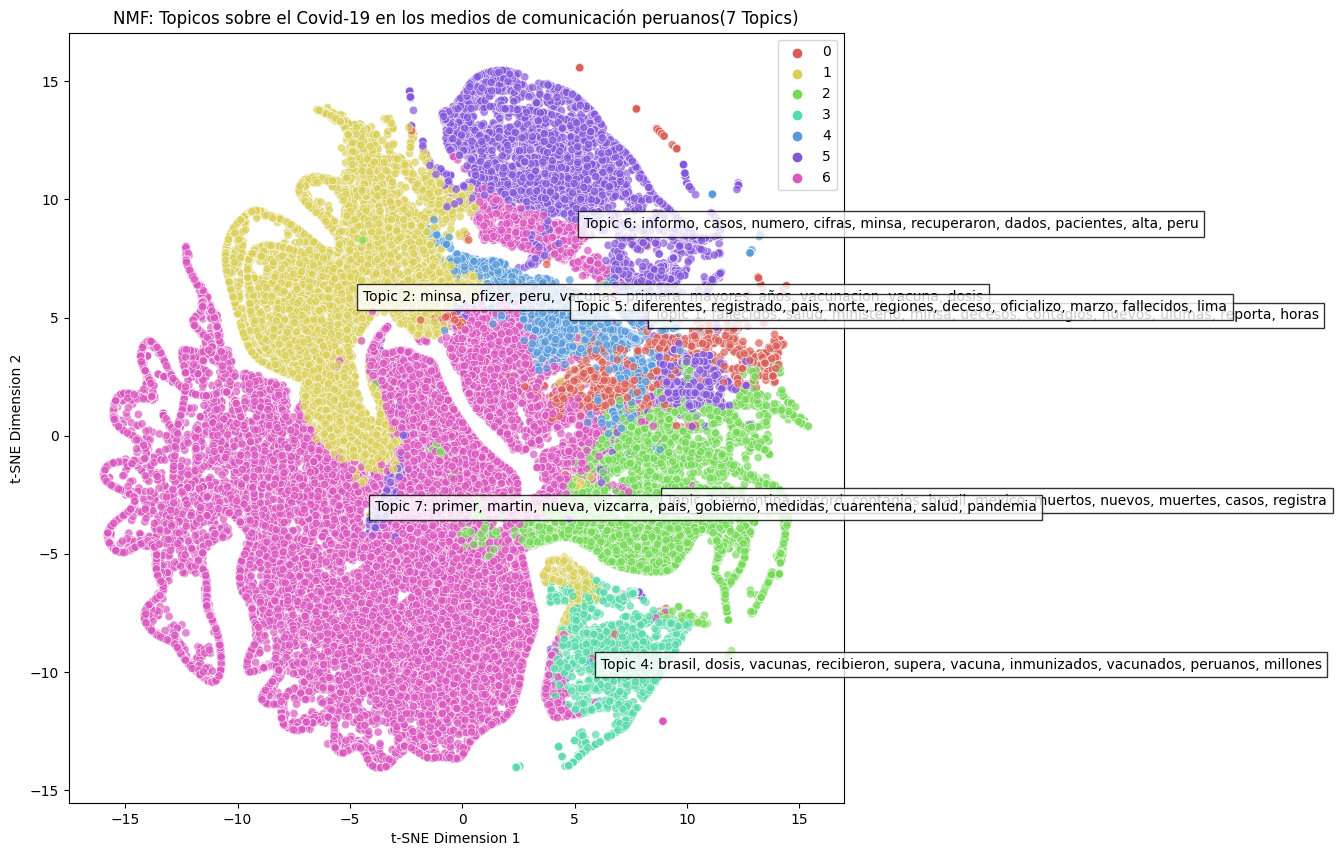

In [ ]:
top_words = []
for topic in P:
    word_idx = topic.argsort()[-10:]
    top_words.append([words[idx] for idx in word_idx])

# Create scatter plot with topic colors and labels a cada documento le asignamos color segun  código
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    hue=Q.argmax(axis=1), # Color-code points by their assigned topic
    palette=sns.color_palette("hls", nmf.n_components),
    legend="full",
    alpha=0.7
)

# Add topic labels to plot
for i, words in enumerate(top_words):
    label = "Topic {}: {}".format(i+1, ", ".join(words))
    x_pos = tsne_results[Q.argmax(axis=1) == i, 0].mean()
    y_pos = tsne_results[Q.argmax(axis=1) == i, 1].mean()
    plt.text(x_pos, y_pos, label, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.title("NMF: Topicos sobre el Covid-19 en los medios de comunicación peruanos({} Topics)".format(nmf.n_components))
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Método 2: Latent Dirichlet Allocation - LDA


Creamos lista con los tweets

In [ ]:
data2 = data1.text_clean.values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
data_words = list(sent_to_words(data2))

In [ ]:
id2word = corpora.Dictionary(data_words)

In [ ]:
print(id2word[4])
print(len(id2word))

vacuna
107604


In [ ]:
texts = data_words

In [ ]:
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       passes=10)

In [ ]:
pprint(lda_model.print_topics(num_words=10))

[(0,
  '0.072*"casos" + 0.037*"contagios" + 0.032*"peru" + 0.030*"muertes" + '
  '0.021*"minsa" + 0.018*"nuevos" + 0.018*"horas" + 0.018*"registra" + '
  '0.017*"fallecidos" + 0.016*"muertos"'),
 (1,
  '0.039*"pacientes" + 0.037*"vacuna" + 0.021*"dosis" + 0.021*"peru" + '
  '0.021*"vacunas" + 0.020*"personas" + 0.017*"alta" + 0.013*"salud" + '
  '0.013*"millones" + 0.012*"minsa"'),
 (2,
  '0.040*"vacunacion" + 0.024*"lima" + 0.024*"anos" + 0.023*"dosis" + '
  '0.015*"mayores" + 0.014*"ninos" + 0.013*"vacuna" + 0.012*"callao" + '
  '0.011*"minsa" + 0.011*"inmunizacion"'),
 (3,
  '0.042*"pandemia" + 0.020*"peru" + 0.012*"emergencia" + 0.007*"cuarentena" + '
  '0.007*"crisis" + 0.006*"millones" + 0.005*"america" + 0.005*"bolsonaro" + '
  '0.005*"brasil" + 0.005*"sanitaria"'),
 (4,
  '0.018*"caso" + 0.016*"primer" + 0.013*"paciente" + 0.013*"positivo" + '
  '0.013*"cuarentena" + 0.011*"nueva" + 0.010*"anos" + 0.009*"china" + '
  '0.009*"mujer" + 0.009*"hospital"'),
 (5,
  '0.022*"salud" + 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_tweets = LDA(n_components=10, random_state=42)
lda_tweets.fit(tfs)

LatentDirichletAllocation(random_state=42)

In [ ]:
for idx, topic in enumerate(lda_tweets.components_):
    print(f"las 10 palabras más importantes por tema #{idx}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('')

las 10 palabras más importantes por tema #0:
['indigenas', 'cuarentena', 'salud', 'dosis', 'millones', 'vacuna', 'peru', 'casos', 'vacunas', 'pandemia']

las 10 palabras más importantes por tema #1:
['positivo', 'medicos', 'medico', 'salud', 'vacuna', 'medidas', 'millones', 'cuarentena', 'peru', 'pandemia']

las 10 palabras más importantes por tema #2:
['pacientes', 'gobierno', 'personas', 'medidas', 'años', 'cuarentena', 'casos', 'peru', 'salud', 'pandemia']

las 10 palabras más importantes por tema #3:
['presidente', 'pais', 'dosis', 'cuarentena', 'vacunas', 'vacuna', 'pandemia', 'peru', 'martin', 'vizcarra']

las 10 palabras más importantes por tema #4:
['vacunas', 'registra', 'lima', 'cuarentena', 'muertes', 'vacuna', 'casos', 'vacunacion', 'peru', 'pandemia']

las 10 palabras más importantes por tema #5:
['argentina', 'johnson', 'salud', 'peruanos', 'millones', 'dosis', 'cuarentena', 'vacuna', 'peru', 'pandemia']

las 10 palabras más importantes por tema #6:
['vacunas', 'nuevo', '

Podemos apreciar que el modelo LDA no está generando temas tan diferenciados, al observar una elevada repetición de las mismas palabras en los 10 temas. Esto se debe principalmente a que, a diferencia del NNMF, el LDA no utiliza términos frecuencia, sino que también toma en cuenta la frecuencia en relación a la distribucion de la palabra en el total del corpus. Probaremos cambiando los parámetros para evaluar si hay una mejora

**7 topics**

In [ ]:
from pprint import pprint
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=7,
                                       passes=10)

In [ ]:
pprint(lda_model.print_topics(num_words=10))

[(0,
  '0.012*"china" + 0.011*"casos" + 0.011*"variante" + 0.010*"caso" + '
  '0.008*"primer" + 0.008*"nueva" + 0.008*"confirma" + 0.007*"italia" + '
  '0.007*"cuarentena" + 0.006*"personas"'),
 (1,
  '0.022*"vizcarra" + 0.018*"martin" + 0.015*"urgente" + 0.010*"pacientes" + '
  '0.010*"cuarentena" + 0.008*"peru" + 0.006*"dia" + 0.006*"presidente" + '
  '0.006*"medidas" + 0.005*"oxigeno"'),
 (2,
  '0.047*"casos" + 0.033*"peru" + 0.027*"contagios" + 0.024*"muertes" + '
  '0.023*"minsa" + 0.020*"pacientes" + 0.018*"alta" + 0.018*"nuevos" + '
  '0.018*"horas" + 0.018*"registra"'),
 (3,
  '0.033*"pandemia" + 0.008*"salud" + 0.007*"medidas" + 0.007*"verificadorlr" '
  '+ 0.006*"positivo" + 0.006*"pruebas" + 0.006*"gobierno" + 0.005*"congreso" '
  '+ 0.005*"prueba" + 0.004*"vacunas"'),
 (4,
  '0.024*"cuarentena" + 0.010*"pandemia" + 0.010*"hospital" + 0.009*"peru" + '
  '0.008*"lima" + 0.007*"medico" + 0.006*"medicos" + 0.006*"pacientes" + '
  '0.006*"emergencia" + 0.005*"personas"'),
 (5,
 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_tweets = LDA(n_components=7, random_state=42)
lda_tweets.fit(tfs)

LatentDirichletAllocation(n_components=7, random_state=42)

In [ ]:
for idx, topic in enumerate(lda_tweets.components_):
    print(f"las 10 palabras más importantes por tema #{idx}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('')

las 10 palabras más importantes por tema #0:
['cuarentena', 'registra', 'muertes', 'dosis', 'vacuna', 'millones', 'vacunas', 'pandemia', 'peru', 'casos']

las 10 palabras más importantes por tema #1:
['vacunacion', 'medidas', 'vacuna', 'pruebas', 'salud', 'casos', 'cuarentena', 'millones', 'peru', 'pandemia']

las 10 palabras más importantes por tema #2:
['pacientes', 'personas', 'vacunacion', 'registra', 'contagios', 'muertes', 'salud', 'peru', 'pandemia', 'casos']

las 10 palabras más importantes por tema #3:
['vacuna', 'casos', 'muertes', 'fallecidos', 'martin', 'pais', 'personas', 'pandemia', 'vizcarra', 'peru']

las 10 palabras más importantes por tema #4:
['cuarentena', 'personas', 'años', 'vacuna', 'casos', 'lima', 'dosis', 'pandemia', 'peru', 'vacunacion']

las 10 palabras más importantes por tema #5:
['salud', 'dosis', 'peruanos', 'argentina', 'millones', 'casos', 'cuarentena', 'vacuna', 'pandemia', 'peru']

las 10 palabras más importantes por tema #6:
['peru', 'casos', 'deces

El reducir el número de topics no parece ayudar en la identificación de temas claramente distingibles entre si:
- cuaretena aparece en los tópicos 0, 1, 4 y 5.
- vacuna: Aparece en los tópicos 0, 1, 3, 4 y 5.
- casos: Aparece en los tópicos 1, 2, 3, 4, 5 y 6.
- pandemia: Aparece en los tópicos 0, 1, 2, 3, 4 y 5.
- salud: Aparece en los tópicos 1, 2, 5 y 6.
- perú: Aparece en los tópicos 0, 1, 2, 3, 4, 5 y 6.
- muertes: Aparece en los tópicos 0, 2, 3 y 4.
- millones: Aparece en los tópicos 0, 1, 2 y 5.

#Conclusiones

El método de Non Negative Matrix Factorization fue el más efectivo para aproximarnos a los principales temas los tuits de los medios de noticias sobre el Covid-19. En contraste, el método LDA tuvo problemas para generar temas diferenciados, identificando palabras más generales que se repetian en los distintos tópicos.

El NNMF permite aprecia que los medios de noticias realizaron un reporte continuo sobre el covid reportando las cifras actualizadas de contagios y fallecidos a nivel nacional proporcionadas por el MINSA y las cifras de distintos países a nivel internacional. El tema predominante fueron las medidas tomadas por el gobierno de Vizcarra. Finalmente, otro tema central de información fueron los procesos de vacunación, que contribuyeron con acelerar su proceso y que se lleve a cabo de manera exitosa.



#Bibliografía

- Hoyt, D. L., Hiserodt, M., Gold, A. K., Milligan, M. A., & Otto, M. W. (2022). Is Ignorance Bliss? Examining the Effect of News Media Exposure on Anxiety and Depression During the COVID-19 Pandemic. The Journal of nervous and mental disease, 210(2), 91–97. https://doi.org/10.1097/NMD.0000000000001434
- Malecki, K. M., Keating, J. A., & Safdar, N. (2021). Crisis communication and public perception of COVID-19 risk in the era of social media. Clinical infectious diseases, 72(4), 697-702.
- Ponce de León, Z. (2021). Sistema de Salud en el Perú y el COVID-19.
- Worldometer (2023) Reporte de contagios y muertes por COVID 19.
Recuperado el 7 de julio de 2023 de https://www.worldometers.info/coronavirus/
